In [40]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch

from matplotlib.pyplot import imshow
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

In [92]:
def get_transform(centercrop, resize, totensor, normalize, normalize2):
    options = []
    if centercrop:
        options.append(transforms.CenterCrop(100))
    if resize:
        options.append(transforms.Resize((80, 80)))
    if totensor:
        options.append(transforms.ToTensor())
    if normalize:
        options.append(transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5]))
    if normalize2:
        options.append(transforms.Normalize(mean=[-1,-1,-1],std=[2,2,2]))
    
    transform = transforms.Compose(options)
    return transform

In [93]:
path = './data/faces'

### resize

In [94]:
transforming = get_transform(True, False, True, False, False)

In [95]:
dataset = datasets.ImageFolder(path, transform=transforming)

In [96]:
dataset

Dataset ImageFolder
    Number of datapoints: 69
    Root location: ./data/faces
    StandardTransform
Transform: Compose(
               CenterCrop(size=(100, 100))
               ToTensor()
           )

In [97]:
data_loader = torch.utils.data.DataLoader(dataset,
                                         batch_size=2,
                                         shuffle=True,
                                         num_workers=8)

In [98]:
data_iter = iter(data_loader)
images, _ = next(data_iter)

print(images.size())

torch.Size([2, 3, 100, 100])


In [99]:
to_img = ToPILImage()

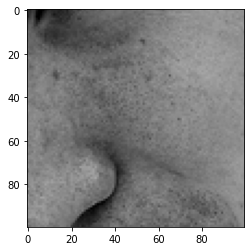

In [100]:
imshow(to_img(images[0]))